# Team 40 | Visualization

*Natural Disaster Projection Due To Climate Change Effects*

* Luis Ruiz Ponce.
* Simón Vallejo.
* Malcom Giraldo.
* Christian Fuertes.
* Juan Felipe Monsalvo.
* Sandra Barreto.
* Guillermo Giraldo.
* Francisco Rodriguez.


## Libraries import

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics
from math import sqrt

import os

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import time
import itertools
import warnings
import statsmodels.api as sm

from scipy import stats
import statsmodels.formula.api as smf

import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Function definition

In [3]:
def missing_percentage(df):
  """
  This function calculate the percentage of missing values by columns in a dataframe
  INPUT:
    df: Pandas dataframe to analyze
  RETURN:
    missing_df: df containing the number and percentage of missing in every columns
  """
  missing_df = df.isnull().sum().to_frame().reset_index()
  missing_df.columns=["Features", "# Missing Values"]
  missing_df["% of Missing Values"] = (missing_df["# Missing Values"] / len(df) ) * 100

  return missing_df

##Mounting the Google Drive

In [4]:
# Loading our own drive from google
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Exploring the folders

In [5]:
# Path variables
data_path = '/drive/MyDrive/DS4A - Team 40/00_DATA'
raw_data_path = data_path + '/00_RAW_DATA'
clean_data_path = data_path + '/01_CLEAN_DATA'

In [6]:
# All the files and folders under our path
print(f'These are the files inside directory 00_DATA {os.listdir(data_path)}')
print(f'These are the files inside directory 00_DATA/00_RAW_DATA {os.listdir(raw_data_path)}')
print(f'These are the files inside directory 00_DATA/01_CLEAN_DATA {os.listdir(clean_data_path)}')

These are the files inside directory 00_DATA ['00_RAW_DATA', '01_CLEAN_DATA', 'XX_HTML', 'Data_EDA_Country | Team 40.ipynb', 'EDA.oxps', 'Images', 'Data_EDA Test| Team 40.ipynb', 'Data_EDA_Luis | Team 40.ipynb', '01_Visualization_Disasters| Team 40.ipynb', 'Data_EDA Disasters| Team 40.ipynb', 'Data_EDA Climate| Team 40.ipynb', 'Read_netCDF - Climate| Team 40.ipynb', 'Model_Temp| Team 40.ipynb', 'Visualization_Temp| Team 40.ipynb', 'Model_Disasters| Team 40.ipynb']
These are the files inside directory 00_DATA/00_RAW_DATA ['GlobalLandTemperaturesByCity.csv', 'GlobalLandTemperaturesByCountry.csv', 'GlobalTemperatures.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalLandTemperaturesByMajorCity.csv', 'DISASTERS', 'New', 'new_disaster_data_EXCEL.xlsx', 'disaster_data.csv', 'climatology_Months.nc', 'climatology_Year.nc', 'Temperature_by_countries', 'temp_mean.7z', 'tas_timeseries_monthly_cru_1901-2020_ABW.csv', 'Temperature_by_countries_fixed', 'temp_by_country.csv', 'ISO_country.csv', 'temp

## Visualization

##### Date variable


In [7]:
# Loading the data file as pandas  dataframe
filename = raw_data_path + '/serie_disaster.xlsx'
disas = pd.read_excel(filename)

print(f'This is the file fo this section {filename}')
disas.head(5)

This is the file fo this section /drive/MyDrive/DS4A - Team 40/00_DATA/00_RAW_DATA/serie_disaster.xlsx


,Year,Count,date
0,1960,39,1960-01-01
1,1961,29,1961-01-01
2,1962,29,1962-01-01
3,1963,44,1963-01-01
4,1964,63,1964-01-01


In [8]:
# generamos el dataframe completo de nuestro análisis
disas["Count_log"] = disas["Count"].apply(np.log)
disas["Count_log_diff"] = disas["Count_log"].diff() #Resta el valor del año anterior en este caso (siempre la fecha anterior a la que indiques)
disas["Count_diff"] = disas["Count"].diff()
disas["date"] = pd.to_datetime(disas["date"], format = "%Y")
disas.set_index("date", inplace = True)
disas.dropna(inplace = True, axis = "rows")
disas.head()

,Year,Count,Count_log,Count_log_diff,Count_diff
date,,,,,
1961-01-01,1961,29,3.367296,-0.296266,-10.0
1962-01-01,1962,29,3.367296,0.000000,0.0
1963-01-01,1963,44,3.784190,0.416894,15.0
1964-01-01,1964,63,4.143135,0.358945,19.0
1965-01-01,1965,67,4.204693,0.061558,4.0


In [9]:
disas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 1961-01-01 to 2021-01-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            61 non-null     int64  
 1   Count           61 non-null     int64  
 2   Count_log       61 non-null     float64
 3   Count_log_diff  61 non-null     float64
 4   Count_diff      61 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.9 KB


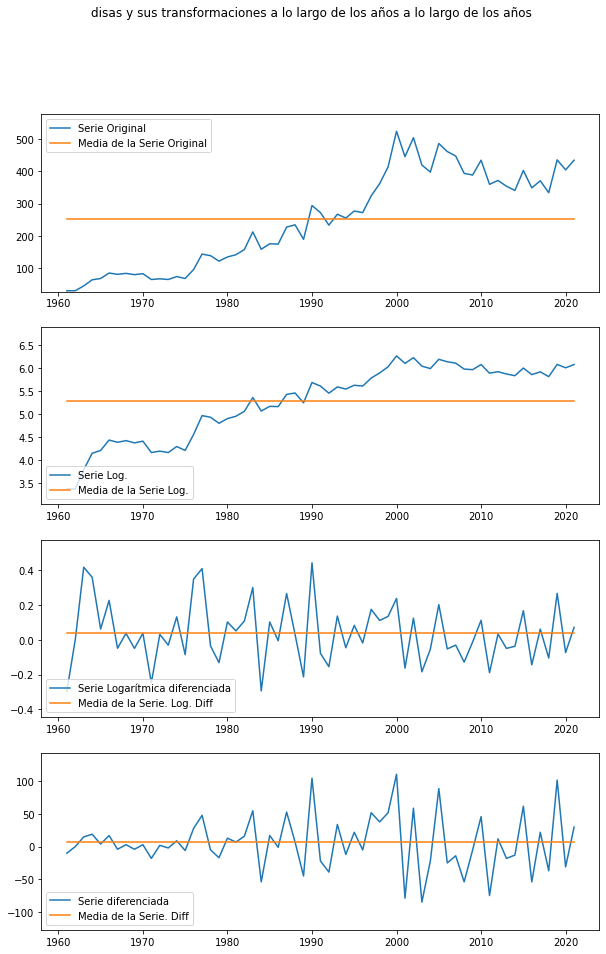

In [10]:
# separar x y la y para el gráfico
x = disas.index

y = disas["Count"]
y_media = [np.mean(y) for _ in y]

y_log = disas["Count_log"]
y_log_media = [np.mean(y_log) for _ in y_log]

y_log_diff = disas["Count_log_diff"]
y_log_diff_mean = [np.mean(y_log_diff) for _ in y_log_diff]

y_diff = disas["Count_diff"]
y_diff_mean = [np.mean(y_diff) for _ in y_diff]

# visualización de los datos anteriores a los largo de los años
fig = plt.figure(figsize = (10, 15))
ax1, ax2, ax3, ax4 = fig.subplots(4, 1)


ax1.plot(x, y, label = "Serie Original")
ax1.plot(x, y_media, label = "Media de la Serie Original")
ax1.set_ylim(np.min(y)*0.9, np.max(y)*1.1)
ax1.legend(loc = "upper left")

ax2.plot(x, y_log, label = "Serie Log.")
ax2.plot(x, y_log_media, label = "Media de la Serie Log.")
ax2.set_ylim(np.min(y_log)*0.9, np.max(y_log)*1.1)
ax2.legend(loc = "lower left")

ax3.plot(x, y_log_diff, label = "Serie Logarítmica diferenciada")
ax3.plot(x, y_log_diff_mean, label = "Media de la Serie. Log. Diff")
ax3.set_ylim(np.min(y_log_diff)*1.5, np.max(y_log_diff)*1.3)
ax3.legend(loc = "lower left")

ax4.plot(x, y_diff, label = "Serie diferenciada")
ax4.plot(x, y_diff_mean, label = "Media de la Serie. Diff")
ax4.set_ylim(np.min(y_diff)*1.5, np.max(y_diff)*1.3)
ax4.legend(loc = "lower left")

fig.suptitle("disas y sus transformaciones a lo largo de los años a lo largo de los años");

In [11]:
for serie, nombre_serie in zip([y, y_log, y_log_diff, y_diff], ["Serie Original", "Serie Log.", "Serie. Log. Diff", "Serie Diff"]):
    
    print("------------------------------------------------------------------")
    
    print("Estamos trabajando con la serie {}\n".format(nombre_serie))
    resultado_analisis = adfuller(serie)
    
    valor_estadistico_adf = resultado_analisis[0]
    p_valor = resultado_analisis[1]
    
    print("Valor estadistico de ADF de las tablas precalculadas: {}".format(-2.89))
    print("Valor estadistico de ADF: {}\n".format(valor_estadistico_adf))
    
    print("Nivel de significación para tomar la serie como estacionaria {}".format(0.05))
    print("p-valor: {}\n".format(p_valor))

------------------------------------------------------------------
Estamos trabajando con la serie Serie Original

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -1.0535157259663646

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 0.7332490788189763

------------------------------------------------------------------
Estamos trabajando con la serie Serie Log.

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -2.826857808992334

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 0.05453855285583349

------------------------------------------------------------------
Estamos trabajando con la serie Serie. Log. Diff

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -9.092851498292848

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 3.783154289246689e-15

-------------------------------------------------

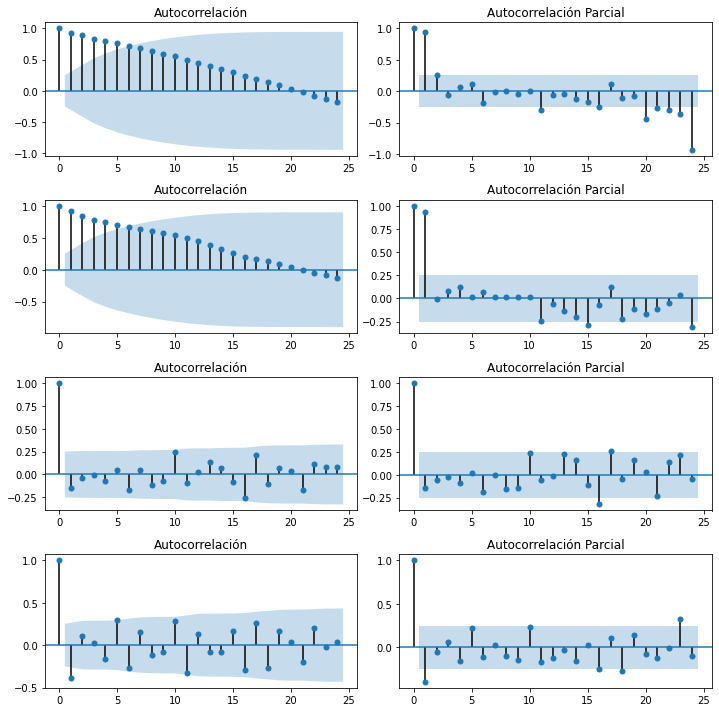

In [12]:
LAGS = 24

fig = plt.figure(figsize = (10, 10))

((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = fig.subplots(4, 2)

# ----------------------------------------------------------------------------------------------------
# plot the data using the built in plots from the stats module
plot_acf(y, ax = ax1, lags = LAGS, title = "Autocorrelación")
plot_pacf(y, ax = ax2, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_log, ax = ax3, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_log, ax = ax4, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_log_diff, ax = ax5, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_log_diff, ax = ax6, lags = LAGS, title = "Autocorrelación Parcial")

plot_acf(y_diff, ax = ax7, lags = LAGS, title = "Autocorrelación")
plot_pacf(y_diff, ax = ax8, lags = LAGS, title = "Autocorrelación Parcial")

fig.tight_layout()

In [13]:
serie_a_predecir = y_diff

In [14]:
serie_a_predecir = y_diff
y_index = serie_a_predecir.index

date_train = int(len(y_index)*0.9)

y_train = serie_a_predecir[y_index[:date_train]]
y_test = serie_a_predecir[y_index[date_train:len(y_index)]]

In [15]:
y_train.tail()

date
2010-01-01    46.0
2011-01-01   -75.0
2012-01-01    12.0
2013-01-01   -18.0
2014-01-01   -13.0
Name: Count_diff, dtype: float64

In [16]:
y_test.head()

date
2015-01-01     62.0
2016-01-01    -54.0
2017-01-01     22.0
2018-01-01    -37.0
2019-01-01    102.0
Name: Count_diff, dtype: float64

In [17]:
# Para hacer el gridsearch, vamos a calcular los posibles valores que vamos a pasarle al modelo.
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Vamos a utilizar el modelo SARIMAX, porque en su implementaciòn en Python existen herramientas adicionales
# que nos facilitan el análisis y que no están disponibles en la implementación de ARIMA.

# Ahora bien, SARIMAX es un modelo ARIMA pero con un componente estacional (la leta S de Seasonal) y también
# un componente exógeno (X de eXogenous regressors)
# Por tanto un modelo SARIMAX de (1, 1, 1) x (0, 0, 0, 0)
# Es un modelo ARIMA (1, 1, 1)

# En caso de querer probar un modelo SARIMAX completo, ejecutar la siguiente línea de itertools.
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Los dejamos a cero para sólo analizar un modelo ARIMA.
seasonal_pdq = [(0, 0, 0, 0)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 0, 0)
SARIMAX: (0, 1, 0) x (0, 0, 0, 0)


In [18]:
st = time.time()

best_score = 0
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # guardamos el mejor resultado
            if best_score == 0:
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
                
            elif abs(results.aic) < abs(best_score):
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            
        # alguna combinación de parámetros en SARIMAX, no son válidos
        # y los vamos a cazar con un except
        except:
            continue

et = time.time()

print("La búsqueda de parámetros no ha llevado {} minutos!".format((et - st)/60))


ARIMA(0, 0, 0)x(0, 0, 0, 0)12 - AIC:545.3219843319783
ARIMA(0, 0, 1)x(0, 0, 0, 0)12 - AIC:534.2617404002862
ARIMA(0, 0, 2)x(0, 0, 0, 0)12 - AIC:526.0826989572581
ARIMA(0, 1, 0)x(0, 0, 0, 0)12 - AIC:584.9105223161793
ARIMA(0, 1, 1)x(0, 0, 0, 0)12 - AIC:530.913467762971
ARIMA(0, 1, 2)x(0, 0, 0, 0)12 - AIC:519.2092366734415
ARIMA(0, 2, 0)x(0, 0, 0, 0)12 - AIC:635.0626936963214
ARIMA(0, 2, 1)x(0, 0, 0, 0)12 - AIC:569.3313260591553
ARIMA(0, 2, 2)x(0, 0, 0, 0)12 - AIC:519.8647239630725
ARIMA(1, 0, 0)x(0, 0, 0, 0)12 - AIC:542.9848965040583
ARIMA(1, 0, 1)x(0, 0, 0, 0)12 - AIC:535.7916611955008
ARIMA(1, 0, 2)x(0, 0, 0, 0)12 - AIC:528.2131962579269
ARIMA(1, 1, 0)x(0, 0, 0, 0)12 - AIC:560.2771665872497
ARIMA(1, 1, 1)x(0, 0, 0, 0)12 - AIC:527.7929174317969
ARIMA(1, 1, 2)x(0, 0, 0, 0)12 - AIC:525.5426099049153
ARIMA(1, 2, 0)x(0, 0, 0, 0)12 - AIC:598.8860203482884
ARIMA(1, 2, 1)x(0, 0, 0, 0)12 - AIC:546.0813199450587
ARIMA(1, 2, 2)x(0, 0, 0, 0)12 - AIC:517.0828060920127
ARIMA(2, 0, 0)x(0, 0, 0, 0)12

In [19]:
print("El mejor modelo es {}, \nCon un AIC de {}".format(best_params, best_score))

El mejor modelo es (1, 2, 2), 
Con un AIC de 517.0828060920127


In [20]:
# Entrenamos el modelo con los mejores parametros.

mod = sm.tsa.statespace.SARIMAX(y_train,
                                order = (1,2,2),
                                seasonal_order = (0,0,0,0),
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

In [21]:
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3367      0.174     -1.933      0.053      -0.678       0.005
ma.L1         -2.1268      0.186    -11.427      0.000      -2.492      -1.762
ma.L2          1.1424      0.163      7.001      0.000       0.823       1.462
sigma2      1333.1534    503.809      2.646      0.008     345.706    2320.601


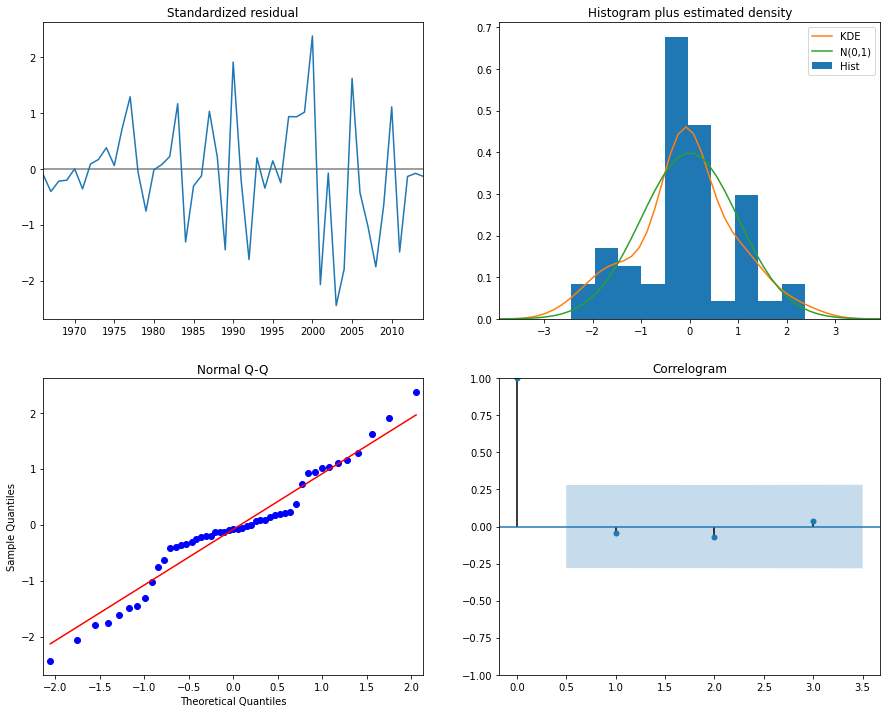

In [22]:
results.plot_diagnostics(figsize = (15, 12), lags = 3);

In [23]:
# Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar.
pred_uc = results.get_forecast(steps = len(y_test))

# Calcula el intervalo de confianza de la predicción.
pred_ci = pred_uc.conf_int()

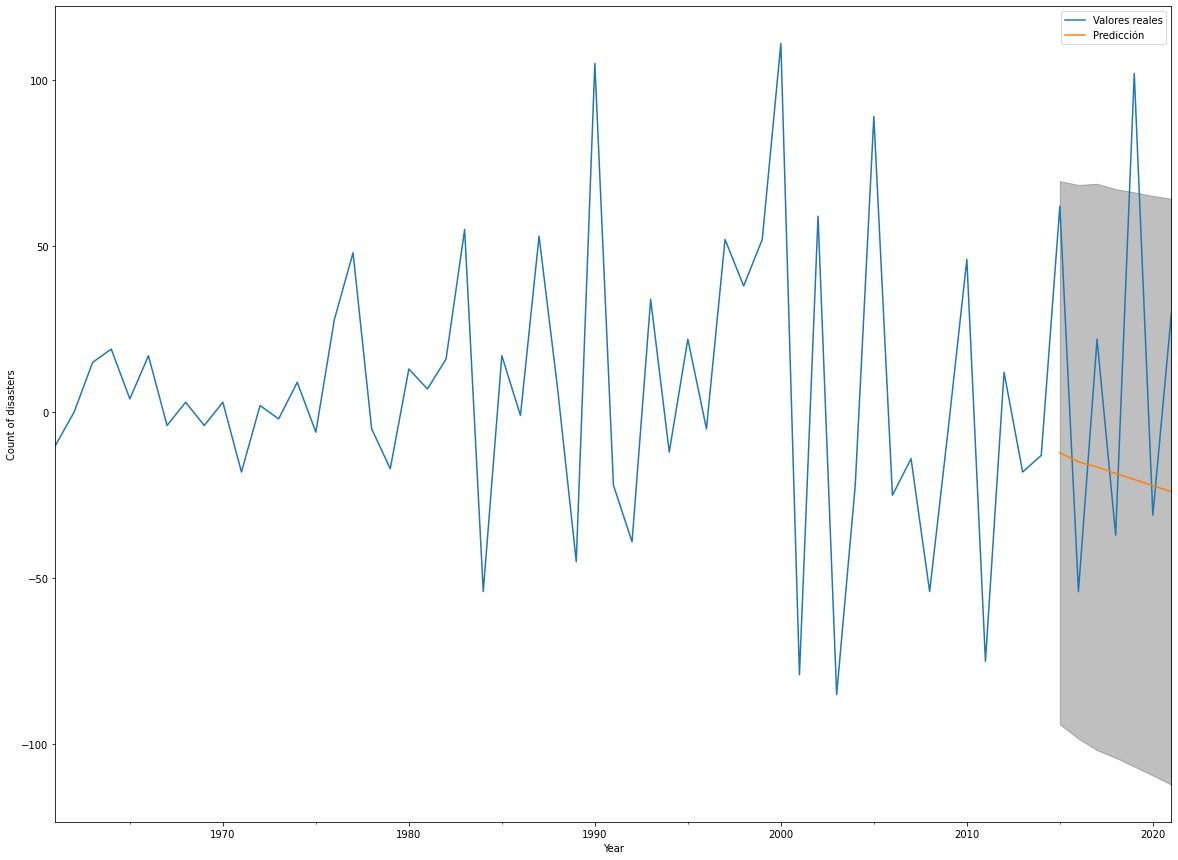

In [24]:
ax = serie_a_predecir.plot(label = 'Valores reales', figsize = (20, 15))

pred_uc.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Year')
ax.set_ylabel('Count of disasters')

plt.legend()
plt.show()

In [25]:
y_pred = pred_ci.iloc[:, 0]

In [26]:
# El RMSE
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))

print("El modelo ARIMA con los parametros {}, ha dado un rmse en test de {}".format(best_params, round(rmse, 2)))

El modelo ARIMA con los parametros (1, 2, 2), ha dado un rmse en test de 128.73


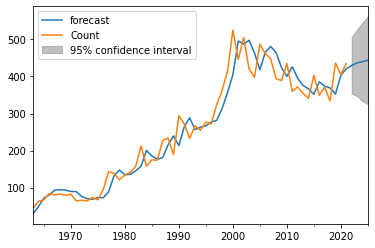

In [27]:
from statsmodels.tsa.arima_model import ARIMA

model_1=ARIMA(disas['Count'],order=(1,2,2))
model_fit1=model_1.fit()
fig=model_fit1.plot_predict(start='1963-01-01', end='2025-01-01')
fig.show()

In [28]:
# Loading the clean data file as pandas  dataframe
filename = clean_data_path + '/Disaster_Clean.xlsx'
df_disaster = pd.read_excel(filename)

print(f'This is the file being loaded {filename}')
df_disaster.head()

This is the file being loaded /drive/MyDrive/DS4A - Team 40/00_DATA/01_CLEAN_DATA/Disaster_Clean.xlsx


,Year,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,...,Latitude,Longitude,River Basin,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)"
0,1960.0,Geophysical,Earthquake,Tsunami,NaN,NaN,Chile,CHL,South America,Americas,...,-38.143,-73.407,NaN,5.0,1960.0,5.0,6000.0,2003000.0,550000.0,5039165.0
1,1960.0,Meteorological,Storm,Tropical cyclone,NaN,Donna,Anguilla,AIA,Caribbean,Americas,...,NaN,NaN,NaN,9.0,1960.0,9.0,5.0,1250.0,35000.0,320674.0
2,1960.0,Meteorological,Storm,Tropical cyclone,NaN,Donna,Netherlands Antilles,NLD,Caribbean,Americas,...,NaN,NaN,NaN,9.0,1960.0,9.0,NaN,NaN,NaN,0.0
3,1960.0,Meteorological,Storm,Tropical cyclone,NaN,Donna,Antigua and Barbuda,ATG,Caribbean,Americas,...,NaN,NaN,NaN,9.0,1960.0,9.0,2.0,NaN,NaN,0.0
4,1960.0,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,...,NaN,NaN,NaN,10.0,1960.0,10.0,3000.0,NaN,NaN,0.0


In [29]:
columna_analizar = "Year"
disasters_by_year = df_disaster[columna_analizar].value_counts().to_frame().reset_index()
disasters_by_year.columns = [columna_analizar, "Count"]
disasters_by_year = disasters_by_year.sort_values(by=columna_analizar,ascending = True )
disasters_by_year.tail(10)
#disasters_by_year.shape

,Year,Count
16,2012.0,372
20,2013.0,354
22,2014.0,341
12,2015.0,403
21,2016.0,349
17,2017.0,371
23,2018.0,334
6,2019.0,436
11,2020.0,405
8,2021.0,435


In [30]:
disasters_by_year.drop(disasters_by_year.loc[disasters_by_year['Year']==2021].index, inplace=True)
disasters_by_year.shape

(61, 2)

In [31]:
disasters_by_year['group_1990'] = np.where(disasters_by_year['Year'] > 1990, 'after','before')
disasters_by_year

disasters_before = disasters_by_year[disasters_by_year["group_1990"] == "before"]
disasters_before.shape

disasters_after = disasters_by_year[disasters_by_year["group_1990"] == "after"]
disasters_after.shape

(30, 3)

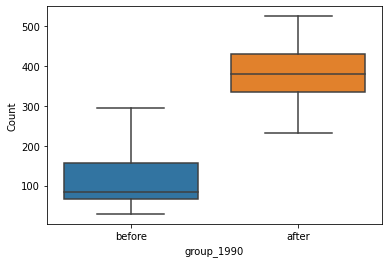

In [32]:
sns.boxplot(data=disasters_by_year, x='group_1990', y='Count')

In [33]:
# Loading the data file as pandas  dataframe
filename = raw_data_path + '/diff_disas_temp.xlsx'
disas = pd.read_excel(filename)

print(f'This is the file fo this section {filename}')
disas.head(5)

This is the file fo this section /drive/MyDrive/DS4A - Team 40/00_DATA/00_RAW_DATA/diff_disas_temp.xlsx


,Year,Count,date,mean_temp,diff_count,diff_temp
0,1961,29,1961-01-01,19.272616,-10,0.028890
1,1962,29,1962-01-01,19.083563,0,-0.189054
2,1963,44,1963-01-01,19.068697,15,-0.014865
3,1964,63,1964-01-01,18.951783,19,-0.116914
4,1965,67,1965-01-01,18.882933,4,-0.068850


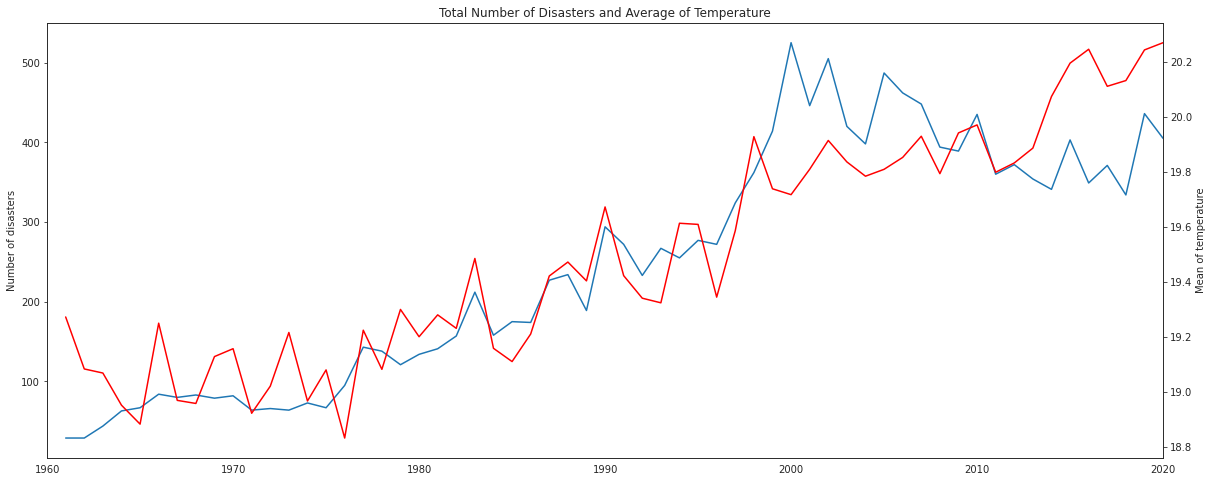

In [34]:
fig = plt.figure(figsize=(20, 8))
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(disas["Year"], disas["Count"])
ax1.set_ylabel('Number of disasters')
ax1.set_title("Total Number of Disasters and Average of Temperature")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(disas["Year"], disas["mean_temp"], 'r')
ax2.set_xlim([1960, 2020])
ax2.set_ylabel('Mean of temperature')
ax2.set_xlabel('Total Number of Disasters and Average of Temperature')

plt.show()

In [35]:
model1 = smf.ols(formula='Count ~ mean_temp', data=disas).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     214.7
Date:                Mon, 04 Jul 2022   Prob (F-statistic):           3.73e-21
Time:                        22:26:16   Log-Likelihood:                -338.10
No. Observations:                  60   AIC:                             680.2
Df Residuals:                      58   BIC:                             684.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6026.5501    428.292    -14.071      0.000   -6883.870   -5169.230
mean_temp    321.7457     21.957     14.653      0.000     277.793     365.698
==============================================================================
Omnibus:                        2.287   Durbin-Watson:                   0.706
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.480
Skew:                           0.325   Prob(JB):                        0.477
Kurtosis:                       3.411   Cond. No.                         941.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

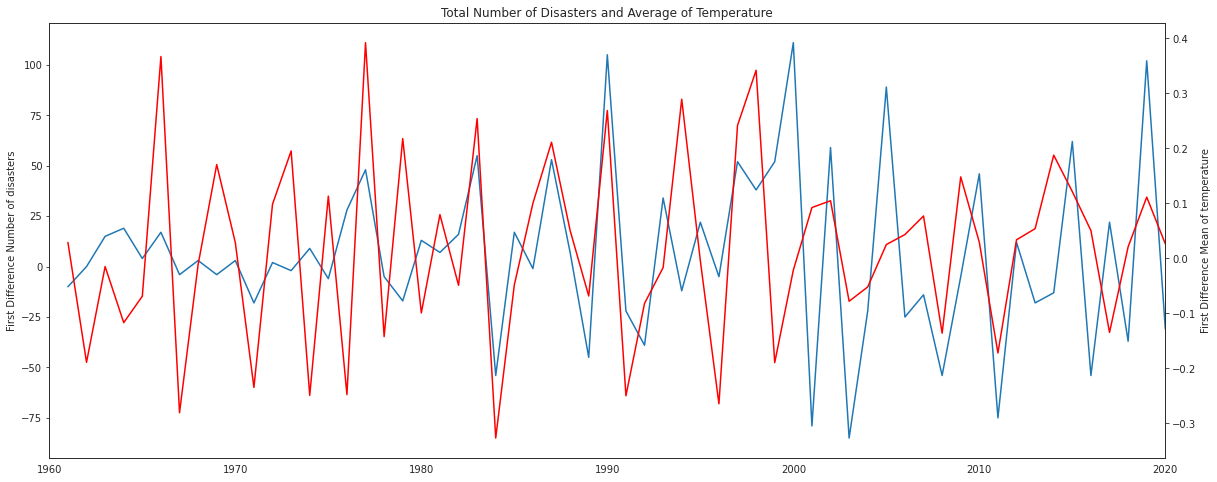

In [ ]:
fig = plt.figure(figsize=(20, 8))
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(disas["Year"], disas["diff_count"])
ax1.set_ylabel('First Difference Number of disasters')
ax1.set_title("Total Number of Disasters and Average of Temperature")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(disas["Year"], disas["diff_temp"], 'r')
ax2.set_xlim([1960, 2020])
ax2.set_ylabel('First Difference Mean of temperature')
ax2.set_xlabel('Total Number of Disasters and Average of Temperature')

plt.show()

In [ ]:
#With the two stationary series, the cross-correlation is calculated
sm.tsa.stattools.ccf(disas["diff_count"], disas["diff_temp"])

array([ 0.31831773, -0.09303315, -0.07945456,  0.05210759,  0.06056575,
        0.07027931, -0.22369374,  0.04161121,  0.21394355, -0.30512774,
        0.21285567, -0.08265996,  0.17975552, -0.01499951, -0.24180197,
        0.05058893, -0.25990062,  0.33396394, -0.02720983, -0.09288008,
       -0.04570362,  0.12114106,  0.11083919, -0.154198  , -0.13846757,
        0.31933574, -0.56973873,  0.47045416, -0.2842971 ,  0.11741032,
       -0.00884328, -0.2627232 ,  0.30230344,  0.02065395, -0.00456887,
       -0.55598842,  0.43839066, -0.21152759, -0.09705348, -0.07959536,
        0.44297195, -0.31574972,  0.48788494, -0.58658931,  0.57900722,
       -0.45612238,  0.51822237,  0.10181063, -0.60567589,  0.8071509 ,
       -0.19689669,  0.20944652, -0.60237023,  0.73526228, -0.06867819,
       -0.34740642,  0.38850911, -0.90083607,  0.62128759, -0.06186991])

In [ ]:
model1 = smf.ols(formula='diff_count ~ diff_temp', data=disas).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             diff_count   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     6.540
Date:                Wed, 29 Jun 2022   Prob (F-statistic):             0.0132
Time:                        01:56:34   Log-Likelihood:                -306.16
No. Observations:                  60   AIC:                             616.3
Df Residuals:                      58   BIC:                             620.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7416      5.252      0.903      0.370      -5.772      15.255
diff_temp     79.3979     31.048      2.557      0.013      17.248     141.547
==============================================================================
Omnibus:                        1.889   Durbin-Watson:                   2.774
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.192
Skew:                           0.312   Prob(JB):                        0.551
Kurtosis:                       3.297   Cond. No.                         5.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
disas['group_1990'] = np.where(disas['Year'] > 1990, 'after','before')
disas

disas_before = disas[disas["group_1990"] == "before"]
disas_before.shape

disas_after = disas[disas["group_1990"] == "after"]
disas_after.shape

(30, 7)

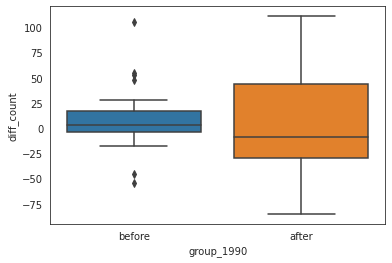

In [ ]:
sns.boxplot(data=disas, x='group_1990', y='diff_count')

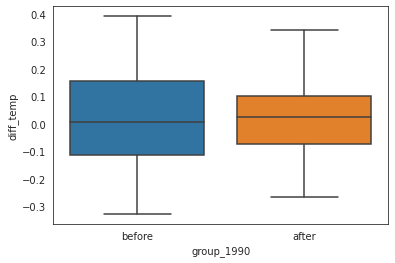

In [ ]:
sns.boxplot(data=disas, x='group_1990', y='diff_temp')

In [ ]:
#With the two stationary series, the cross-correlation is calculated
sm.tsa.stattools.ccf(disas_before["diff_count"], disas_before["diff_temp"])

array([ 0.49655112, -0.22224917, -0.07223635, -0.08485263,  0.38918845,
       -0.06167763, -0.21489477, -0.06111565,  0.35573208, -0.22936868,
        0.16738388,  0.23771238, -0.46851846,  0.45934154, -0.20712747,
        0.1392526 , -0.66078631,  0.71912959, -0.03066859, -0.34826349,
       -0.34148784,  0.49842935,  0.53229552, -1.43602   ,  1.19240405,
       -0.36810521, -0.4601053 ,  0.48622985, -1.85028676,  0.25529725])

In [ ]:
model2 = smf.ols(formula='diff_count ~ diff_temp', data=disas_before).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             diff_count   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     9.163
Date:                Tue, 28 Jun 2022   Prob (F-statistic):            0.00525
Time:                        21:33:36   Log-Likelihood:                -139.40
No. Observations:                  30   AIC:                             282.8
Df Residuals:                      28   BIC:                             285.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4121      4.781      1.550      0.132      -2.381      17.205
diff_temp     76.0594     25.127      3.027      0.005      24.590     127.529
==============================================================================
Omnibus:                        5.435   Durbin-Watson:                   2.388
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                3.785
Skew:                           0.648   Prob(JB):                        0.151
Kurtosis:                       4.161   Cond. No.                         5.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

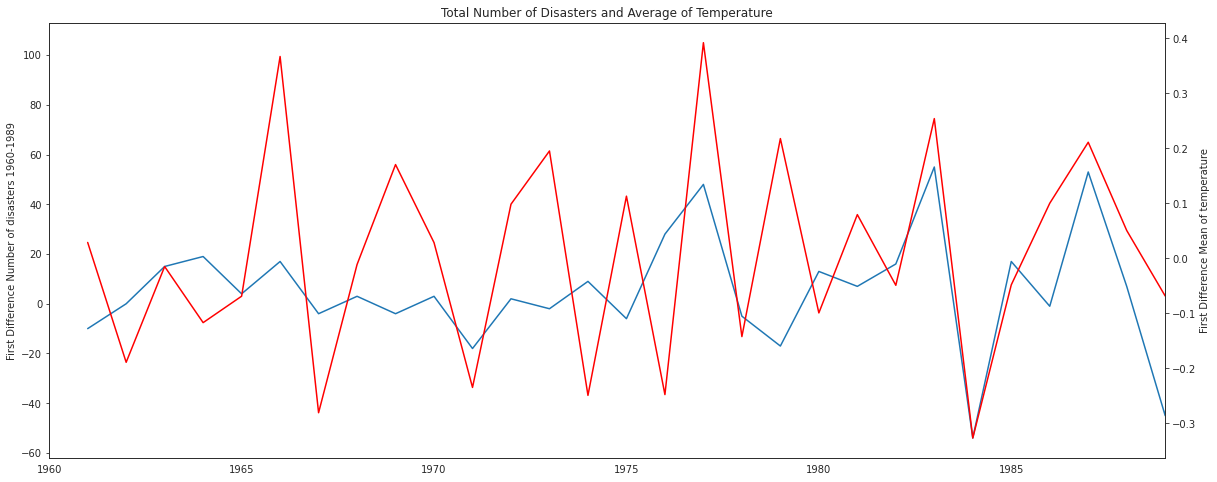

In [ ]:
fig = plt.figure(figsize=(20, 8))
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(disas_before["Year"], disas_before["diff_count"])
ax1.set_ylabel('First Difference Number of disasters 1960-1989')
ax1.set_title("Total Number of Disasters and Average of Temperature")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(disas_before["Year"], disas_before["diff_temp"], 'r')
ax2.set_xlim([1960, 1989])
ax2.set_ylabel('First Difference Mean of temperature')
ax2.set_xlabel('Total Number of Disasters and Average of Temperature')

plt.show()

In [ ]:
#With the two stationary series, the cross-correlation is calculated
sm.tsa.stattools.ccf(disas_after["diff_count"], disas_after["diff_temp"])

array([ 0.23897818,  0.0223184 , -0.0578252 ,  0.1210358 , -0.08598086,
        0.22597685, -0.30647354, -0.00662868,  0.14514942, -0.48203345,
        0.09192698, -0.16462584,  0.49413059, -0.08126783, -0.47337077,
        0.18636594, -0.07096615,  0.36145687,  0.05392145, -0.37582267,
        0.04691137,  0.63470698,  0.19597241, -0.55969032, -0.31407447,
        1.1461318 , -0.46310266,  0.10028604, -1.54885221,  1.26179653])

In [ ]:
model3 = smf.ols(formula='diff_count ~ diff_temp', data=disas_after).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             diff_count   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.696
Date:                Tue, 28 Jun 2022   Prob (F-statistic):              0.203
Time:                        21:33:55   Log-Likelihood:                -160.02
No. Observations:                  30   AIC:                             324.0
Df Residuals:                      28   BIC:                             326.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9887      9.570      0.208      0.837     -17.614      21.591
diff_temp     85.9351     65.988      1.302      0.203     -49.235     221.105
==============================================================================
Omnibus:                        1.115   Durbin-Watson:                   2.787
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.092
Skew:                           0.353   Prob(JB):                        0.579
Kurtosis:                       2.388   Cond. No.                         6.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

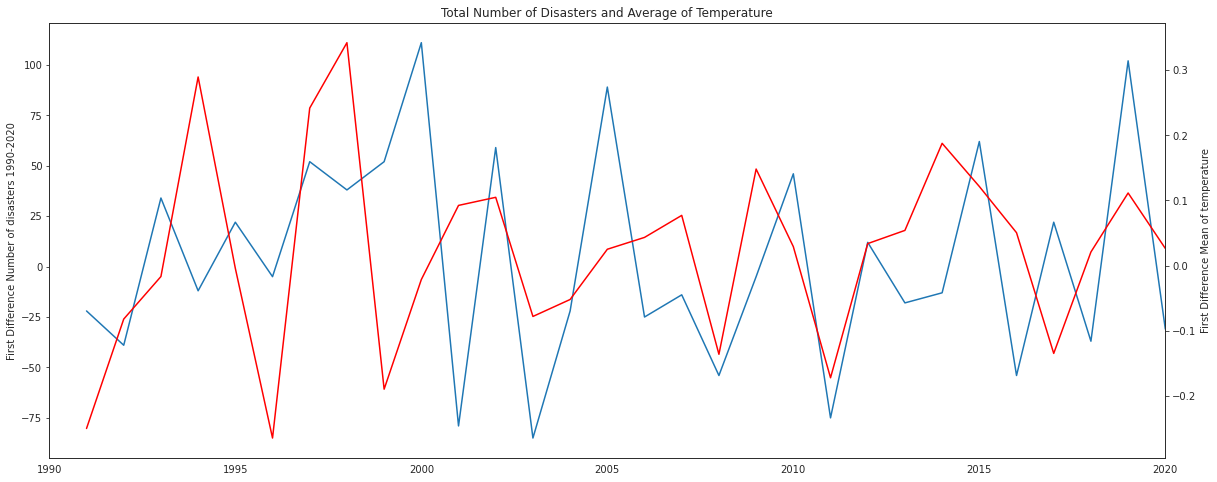

In [ ]:
fig = plt.figure(figsize=(20, 8))
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(disas_after["Year"], disas_after["diff_count"])
ax1.set_ylabel('First Difference Number of disasters 1990-2020')
ax1.set_title("Total Number of Disasters and Average of Temperature")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(disas_after["Year"], disas_after["diff_temp"], 'r')
ax2.set_xlim([1990, 2020])
ax2.set_ylabel('First Difference Mean of temperature')
ax2.set_xlabel('Total Number of Disasters and Average of Temperature')

plt.show()